In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [5]:
df = pd.read_csv('iris.csv')
X = df.drop('species', axis = 1)
y = df['species']

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)
y = keras.utils.to_categorical(y, num_classes=3)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
def create_model(activation):
  model = keras.Sequential([
      layers.Dense(10, activation=activation, input_shape=(4,)), # Hidden layer
      layers.Dense(3, activation='softmax') # Output layer
  ])
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

activations = ['relu', 'sigmoid', 'tanh']

In [15]:
models = {}
histories = {}
for activation in activations:
  models[activation] = create_model(activation)
  histories[activation] = models[activation].fit(X_train, y_train, epochs=50, batch_size=32, verbose=0) # Suppress output
  loss, accuracy = models[activation].evaluate(X_test, y_test, verbose=0)
  print(f"Activation: {activation}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

C:\Users\PRAVEEN ANANTH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation: relu, Loss: 0.6099, Accuracy: 0.7667
Activation: sigmoid, Loss: 0.8116, Accuracy: 0.9000
Activation: tanh, Loss: 0.4064, Accuracy: 0.9000


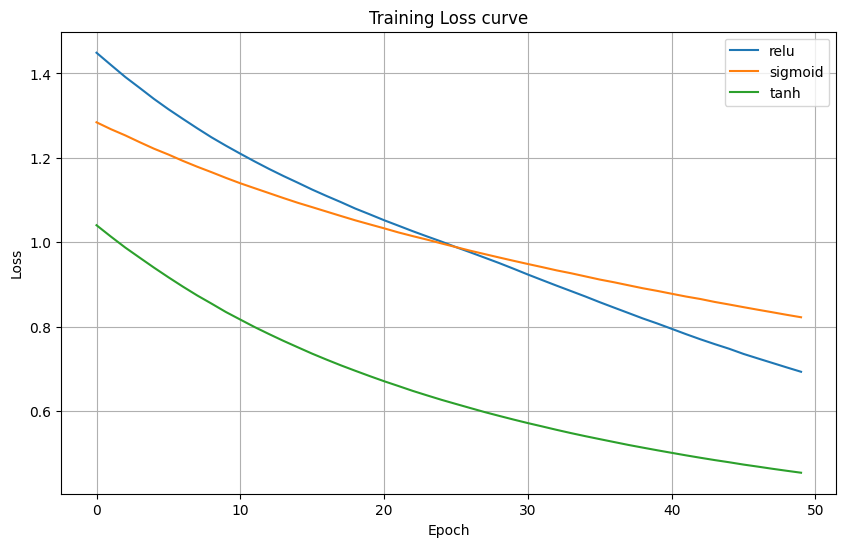

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for activation,history in histories.items():
    plt.plot(history.history['loss'], label=activation)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Training Loss curve")
plt.legend()
plt.grid(True)
plt.show()